<a href="https://colab.research.google.com/github/nancyfosua/Assignments/blob/main/Nancy_Fosua_AdvancedDataScience_Assignment2_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DATA PRE-PROCESSING

**Importing all the crucial libraries**

In [ ]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics.cluster import adjusted_rand_score

**Importing all the six files datasets**

The six files features \\
 mfeat-fou: 76 Fourier coefficients of the character shapes

 mfeat-fac: 216 profile correlations

 mfeat-kar: 64 Karhunen-Love coefficients

 mfeat-pix: 240 pixel averages in 2 x 3 windows

 mfeat-zer: 47 Zernike moments
 
 mfeat-mor: 6 morphological features.


In [ ]:
data1=pd.read_csv('https://raw.githubusercontent.com/Gibbssins/datadigits/main/mfeat-fac.csv',sep=';')
data2=pd.read_csv('https://raw.githubusercontent.com/Gibbssins/datadigits/main/mfeat-fou.csv',sep=';')
data3=pd.read_csv('https://raw.githubusercontent.com/Gibbssins/datadigits/main/mfeat-kar.csv',sep=';')
data4=pd.read_csv('https://raw.githubusercontent.com/Gibbssins/datadigits/main/mfeat-mor.csv',sep=';')
data5=pd.read_csv('https://raw.githubusercontent.com/Gibbssins/datadigits/main/mfeat-pix.csv',sep=';')
data6=pd.read_csv('https://raw.githubusercontent.com/Gibbssins/datadigits/main/mfeat-zer.csv',sep=';')

## Exploratory data analysis

Exploring the datasets to check if we have the correct data shape as describe by the source.

In [ ]:
print(data1.shape,data2.shape,data3.shape,data4.shape,data5.shape,data6.shape)

(2000, 216) (2000, 76) (2000, 64) (2000, 6) (2000, 240) (2000, 47)


Checking for more information about the data

data1 represents mfeat-fac

data2 represents mfeat-fou

data3 represents mfeat-kar

data4 represents  mfeat-mor

data5 represents mfeat-pix

data6 represents mfeat-zer

In [ ]:
data1.info(), 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 216 entries, fac1 to fac216
dtypes: int64(216)
memory usage: 3.3 MB


(None,)

**Creating a different column for the classes for each feature.**
A different column is created where the the first 200 rows belongs to class "0",followed by the second 200 rows which belongs to cluster "1" and so on  and so forth till the last 200 rows which belongs to class "9".

In [ ]:
true_label=np.zeros(2000,dtype=int)
p=0
for i in range(0,2000,200):
  true_label[i:i+200]+=p
  p+=1
print(true_label)

[0 0 0 ... 9 9 9]


**Checking the variability of the values in each feature(dataset).**

There are alot of variations in this dataset. Some features have values as low as 0.03 whilst other features has values as large as 556.82 .There are alot of variations .

mfeat-fac

In [ ]:
data1.head(9)

,fac1,fac2,fac3,fac4,fac5,fac6,fac7,fac8,fac9,fac10,fac11,fac12,fac13,fac14,fac15,fac16,fac17,fac18,fac19,fac20,fac21,fac22,fac23,fac24,fac25,fac26,fac27,fac28,fac29,fac30,fac31,fac32,fac33,fac34,fac35,fac36,fac37,fac38,fac39,fac40,...,fac177,fac178,fac179,fac180,fac181,fac182,fac183,fac184,fac185,fac186,fac187,fac188,fac189,fac190,fac191,fac192,fac193,fac194,fac195,fac196,fac197,fac198,fac199,fac200,fac201,fac202,fac203,fac204,fac205,fac206,fac207,fac208,fac209,fac210,fac211,fac212,fac213,fac214,fac215,fac216
0,98,236,531,673,607,647,2,9,3,6,8,5,225,517,652,624,628,994,7,22,28,13,10,19,305,481,667,663,1009,727,38,28,18,11,20,10,287,567,651,742,...,12,12,19,10,360,328,607,984,1186,599,29,7,14,6,9,9,362,314,924,733,601,1216,4,8,20,10,9,5,251,421,474,536,628,632,18,36,8,15,12,13
1,121,193,607,611,585,665,7,9,2,4,3,7,214,514,690,548,630,1006,2,18,31,15,5,15,260,344,655,605,993,743,29,32,25,11,17,6,308,412,719,700,...,19,8,18,8,351,249,687,922,1194,617,26,11,11,4,10,7,347,439,950,675,577,1222,13,6,27,10,10,3,224,354,520,458,570,634,15,32,11,13,15,11
2,115,141,590,605,557,627,12,6,3,3,5,4,196,404,611,560,594,986,7,21,28,14,7,12,278,406,670,579,991,703,24,29,18,12,19,9,378,468,668,654,...,10,9,20,13,415,323,672,896,1168,595,21,8,14,3,10,12,343,365,877,663,547,1192,18,7,20,13,10,2,196,348,535,498,572,656,20,35,16,14,13,6
3,90,122,627,692,607,642,0,6,4,5,3,5,201,445,664,629,626,945,5,21,27,16,7,9,273,397,703,662,987,710,36,29,21,8,15,10,331,459,731,765,...,15,7,16,10,380,354,711,987,1180,606,27,8,15,5,12,9,400,358,918,756,603,1171,6,7,23,11,12,5,263,419,576,549,628,621,16,35,7,12,15,9
4,157,167,681,666,587,666,8,6,1,4,5,5,212,386,740,613,614,997,5,21,30,11,7,17,248,390,703,662,949,744,28,29,20,13,19,10,244,468,797,743,...,14,8,20,6,337,303,763,989,1156,628,29,8,12,2,10,7,321,337,988,726,577,1225,14,7,22,8,10,5,276,342,594,525,568,653,16,35,10,15,13,13
5,128,224,799,690,653,620,16,22,8,9,2,6,145,363,774,591,682,943,15,23,27,12,6,8,247,335,689,718,915,690,20,25,31,12,12,9,379,365,919,789,...,25,7,13,13,430,334,885,1029,1108,576,39,20,15,9,11,12,346,450,982,762,625,1171,22,19,33,9,11,6,209,257,692,529,562,573,24,17,7,10,14,6
6,185,259,575,615,609,673,2,8,5,7,4,6,278,468,648,606,638,1006,7,21,36,12,6,20,288,508,665,611,1033,751,38,29,26,14,18,11,236,630,697,686,...,18,13,19,7,343,339,661,940,1210,647,29,8,6,7,11,8,345,267,910,677,605,1216,4,7,28,7,11,6,358,408,518,502,632,698,18,35,16,14,14,14
7,133,173,591,665,594,651,1,7,3,5,9,5,260,360,700,620,637,986,4,20,28,12,11,19,322,454,683,679,984,729,35,30,22,16,21,12,240,504,707,738,...,16,11,20,8,317,363,667,1008,1197,603,26,9,14,5,8,9,317,301,958,729,590,1214,7,8,24,11,8,5,278,296,520,522,567,612,15,34,8,16,11,13
8,206,332,561,588,635,693,3,9,8,7,7,9,269,519,664,577,656,1056,8,22,39,12,9,19,325,523,673,586,1029,773,39,28,29,12,19,12,231,655,687,671,...,21,13,18,8,374,306,643,919,1224,645,30,7,3,7,8,9,328,330,926,650,627,1266,3,8,31,7,8,9,371,429,490,473,624,698,19,36,19,14,11,17


mfeat-fou

In [ ]:
data2.head(9)

,fou1,fou2,fou3,fou4,fou5,fou6,fou7,fou8,fou9,fou10,fou11,fou12,fou13,fou14,fou15,fou16,fou17,fou18,fou19,fou20,fou21,fou22,fou23,fou24,fou25,fou26,fou27,fou28,fou29,fou30,fou31,fou32,fou33,fou34,fou35,fou36,fou37,fou38,fou39,fou40,fou41,fou42,fou43,fou44,fou45,fou46,fou47,fou48,fou49,fou50,fou51,fou52,fou53,fou54,fou55,fou56,fou57,fou58,fou59,fou60,fou61,fou62,fou63,fou64,fou65,fou66,fou67,fou68,fou69,fou70,fou71,fou72,fou73,fou74,fou75,fou76
0,0.065882,0.197312,0.103826,0.270362,0.616078,0.035856,0.424572,0.089701,0.367773,0.037065,0.075942,0.263906,0.077903,0.372009,0.219485,0.055327,0.108906,0.127752,0.114051,0.018581,0.102627,0.172682,0.073033,0.140344,0.132199,0.076015,0.032517,0.128840,0.120526,0.016615,0.102583,0.101625,0.065730,0.035213,0.079009,0.083773,0.021491,0.121625,0.067512,0.033777,0.099013,0.059408,0.081286,0.052345,0.090500,0.063582,0.081104,0.059101,0.097236,0.041576,0.083515,0.042379,0.082965,0.077170,0.116732,0.034761,0.109485,0.016423,0.099352,0.113763,0.086372,0.167654,0.106281,0.125783,0.090675,0.081256,0.123448,0.113374,0.074343,0.281666,0.067795,0.344182,0.038963,0.394366,0.049971,0.344871
1,0.049142,0.175971,0.105515,0.227095,0.599280,0.041217,0.431078,0.096801,0.326739,0.059661,0.017184,0.314690,0.012904,0.453107,0.209364,0.053331,0.081334,0.007550,0.234876,0.043490,0.019631,0.161129,0.044329,0.132679,0.130415,0.073866,0.051192,0.030221,0.144867,0.023895,0.016790,0.121181,0.076889,0.054896,0.088678,0.097209,0.019548,0.026906,0.113283,0.020423,0.024929,0.085364,0.090844,0.011986,0.092177,0.072633,0.006894,0.040413,0.007373,0.030241,0.088277,0.101808,0.082933,0.117419,0.030040,0.122958,0.015721,0.081246,0.054884,0.087803,0.069228,0.145889,0.019964,0.193200,0.014135,0.131552,0.045310,0.069337,0.045386,0.254264,0.045447,0.335659,0.021719,0.445277,0.083978,0.354092
2,0.034172,0.227649,0.108766,0.127697,0.612494,0.056554,0.470639,0.041903,0.324267,0.044569,0.017012,0.283372,0.060468,0.364420,0.218012,0.065799,0.100798,0.041148,0.103112,0.029623,0.016676,0.126331,0.073546,0.160574,0.127323,0.076715,0.058565,0.007764,0.074607,0.021533,0.016114,0.090223,0.077979,0.090263,0.072140,0.091450,0.035295,0.020528,0.063147,0.022222,0.038475,0.054014,0.094508,0.039474,0.086138,0.071334,0.014315,0.059481,0.019133,0.046476,0.054556,0.101624,0.073648,0.117885,0.032529,0.057997,0.029461,0.040950,0.033732,0.218233,0.051349,0.190854,0.045106,0.180896,0.036688,0.082467,0.019858,0.218842,0.041087,0.360464,0.047154,0.377408,0.052099,0.445029,0.071234,0.261465
3,0.062336,0.217979,0.080243,0.289592,0.546316,0.045779,0.425545,0.022841,0.331454,0.119052,0.036931,0.224981,0.051425,0.337966,0.152098,0.072680,0.162303,0.037585,0.056670,0.106918,0.017703,0.109614,0.076275,0.187445,0.059987,0.087590,0.113050,0.038817,0.034270,0.088544,0.018063,0.043295,0.089820,0.156005,0.018523,0.088568,0.092721,0.036220,0.045108,0.066557,0.035874,0.013387,0.087210,0.087777,0.076711,0.019268,0.079736,0.044408,0.043399,0.069940,0.067212,0.010513,0.085155,0.017055,0.073653,0.083279,0.020877,0.105687,0.081941,0.023220,0.089021,0.062116,0.069341,0.158564,0.011687,0.165806,0.083995,0.085479,0.087658,0.151880,0.075950,0.293462,0.022675,0.408291,0.063010,0.401376
4,0.061970,0.198358,0.111239,0.253460,0.608455,0.023631,0.415246,0.091866,0.309310,0.049142,0.093298,0.315552,0.051809,0.388674,0.216835,0.049581,0.049233,0.156873,0.206554,0.042255,0.102949,0.155439,0.059885,0.058975,0.125538,0.058147,0.067630,0.148337,0.117097,0.050259,0.078909,0.085289,0.082221,0.080176,0.076863,0.058436,0.062460,0.082330,0.045987,0.043482,0.067768,0.060132,0.063493,0.070777,0.047835,0.072733,0.076327,0.056720,0.066385,0.052332,0.049535,0.084414,0.048125,0.107442,0.057394,0.108580,0.072844,0.071208,0.052613,0.102777,0.026283,0.162884,0.063546,0.185552,0.050646,0.130661,0.021004,0.106960,0.032283,0.248565,0.015674,0.386276,0.039481,0.434701,0.069218,0.405403
5,0.068159,0.351293,0.128993,0.057838,0.515568,0.036970,0.501015,0.088189,0.333595,0.177476,0.064759,0.220439,0.057612,0.3

**mfeat-kar**

In [ ]:
data3.head(9)

,kar1,kar2,kar3,kar4,kar5,kar6,kar7,kar8,kar9,kar10,kar11,kar12,kar13,kar14,kar15,kar16,kar17,kar18,kar19,kar20,kar21,kar22,kar23,kar24,kar25,kar26,kar27,kar28,kar29,kar30,kar31,kar32,kar33,kar34,kar35,kar36,kar37,kar38,kar39,kar40,kar41,kar42,kar43,kar44,kar45,kar46,kar47,kar48,kar49,kar50,kar51,kar52,kar53,kar54,kar55,kar56,kar57,kar58,kar59,kar60,kar61,kar62,kar63,kar64
0,-10.297008,-11.666789,11.560669,-2.081316,4.044656,4.086815,-2.558072,-8.476935,2.138135,3.503082,-0.064074,0.983302,2.001344,1.478683,-0.402921,1.609768,-2.627923,2.741715,-2.283389,1.239708,-1.827247,-1.581615,2.027865,-0.394052,-1.446159,-0.603834,2.475224,-1.096591,1.311422,-0.346206,-0.822164,-1.012095,1.620569,0.262893,0.457352,1.365226,-1.121445,-0.071175,-0.914878,-1.440099,-2.192526,0.830108,0.452905,1.085592,1.960389,-0.877156,0.377651,-0.307988,-0.017944,0.442649,0.620422,-1.135986,0.088799,0.186969,1.078083,0.921927,0.496387,-0.643667,0.284104,0.286555,0.348625,1.814691,-1.351353,-0.473910
1,-5.036009,-12.885333,0.161155,0.592460,3.123534,4.220469,-6.411771,-6.335328,-0.244622,1.346073,-1.888005,-1.425509,3.546106,-2.728002,0.145671,0.144373,1.070799,1.676834,3.458105,2.141824,-0.008930,-1.899805,-0.201592,0.386368,0.325236,-0.857551,2.599812,0.646875,-0.884929,-0.789922,-1.011073,1.085249,-1.010811,-0.528006,-0.950611,0.866379,-1.174443,-0.125630,0.683759,-0.280212,-0.658064,-0.099992,3.127316,0.214157,-0.783071,-0.427827,-2.560559,-1.627720,-1.475449,0.087514,-0.669465,-1.378673,-1.568273,-1.133077,0.942353,2.938791,1.429883,-2.336344,1.281628,-0.098321,0.582357,0.485792,0.642451,0.613107
2,-9.639157,-6.655898,0.388687,-1.717650,0.300346,3.400769,-7.240785,-1.659405,-0.874005,4.153403,-4.732827,2.371873,-0.791784,2.609470,-2.203911,-4.435813,-0.762313,-0.394081,1.133503,2.644041,-3.876470,3.067372,-0.150997,-0.814162,1.290007,-0.885316,2.597499,-3.268025,-1.777111,-0.259310,-2.887960,0.803436,0.885987,1.164181,-2.672265,0.213014,2.502617,0.011691,-0.241381,-0.503143,-2.017740,0.623053,0.297995,0.453539,-0.523467,1.172609,-1.034330,-1.045539,-1.519977,1.578619,0.772292,-1.644673,0.555195,0.372116,-0.413174,-0.023028,-0.025265,1.259838,-0.441360,-0.960094,1.995843,1.097748,0.827182,-1.767840
3,-6.650375,-7.043851,4.104350,-2.342780,3.494658,3.924822,-9.874812,-6.556576,-1.364269,1.153308,-0.525791,1.306552,3.489466,3.987592,-1.356328,-0.857526,1.180557,-4.406371,-1.761988,2.742064,-1.601306,0.721423,2.888973,-0.984098,-0.900931,0.280389,0.000239,-2.231012,-1.077999,-1.499626,-2.011180,0.741876,-0.303120,0.149713,0.072599,-2.515244,0.593984,-1.342731,0.454232,-0.989877,0.388920,-0.539341,0.833950,-0.292633,0.001021,0.540339,0.858158,-0.727200,1.441517,-0.133205,-1.072086,-1.575707,0.276112,-0.553317,-0.961236,-1.043815,-0.204508,-1.981150,0.982438,-0.144233,-1.449328,-0.913552,-0.771735,0.304992
4,-10.664524,-10.974133,0.194391,0.453885,2.193088,-3.304663,-8.376592,-4.241146,2.964818,-0.949622,-1.493196,-1.325390,1.729491,-0.638025,-1.785161,1.266107,0.683632,3.106049,0.812620,1.709782,1.845162,-2.602056,-0.005624,-0.149866,0.549093,-1.272378,1.982501,1.106768,0.183949,0.061280,0.402014,0.814850,-3.796409,-1.317945,-1.210731,-1.223604,-1.281105,0.352830,0.264770,-1.295441,-1.482741,-0.568190,0.887338,2.180462,2.439588,1.228399,-2.084001,0.315359,-0.877886,0.848514,-0.654705,-0.406145,-0.335391,-0.722847,0.152957,1.448160,-1.254907,-3.481295,-0.563889,1.529335,0.510399,0.298318,-0.943213,1.149847
5,3.437618,-3.914502,-1.126803,4.037337,-2.513498,1.733343,-8.812785,-4.181726,8.662117,-2.783926,4.717450,6.021956,8.268522,1.538166,0.339721,4.251977,-1.585564,2.302103,1.989041,1.016005,0.148059,-0.637746,-4.054363,3.966781,-1.820351,3.762352,0.018495,1.508016,0.847587,-2.543335,-1.823698,2.134411,2.375419,2.566131,1.200783,-3.729888,2.008052,-0.781689,2.119131,-3.180233,1.268271,-0.079028,-1.463588,3.051154,0.434093,-0.637227,1.038626,0.734400,-0.524258,0.853772,0.681230,2.523129,0.289757,-0.324695,-0.561103,0.895975,0.520910,-2.052927,-0.572874,0.17

**mfeat-pix**

In [ ]:
data4.head(9)

,mor1,mor2,mor3,mor4,mor5,mor6
0,1.0,0.0,0.0,133.150861,1.311693,1620.221779
1,1.0,0.0,0.0,126.724861,1.302745,1609.334822
2,1.0,0.0,0.0,131.173861,1.319031,1568.978435
3,1.0,0.0,0.0,129.478861,1.270878,1695.055281
4,1.0,0.0,0.0,127.262861,1.329637,1647.720235
5,1.0,0.0,0.0,131.058861,1.310403,2027.211367
6,1.0,0.0,0.0,138.442861,1.379906,1918.750472
7,1.0,0.0,0.0,129.346861,1.305646,1547.263727
8,1.0,0.0,0.0,139.542861,1.374661,1871.055934


In [ ]:
data5.head(9)

,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,pix10,pix11,pix12,pix13,pix14,pix15,pix16,pix17,pix18,pix19,pix20,pix21,pix22,pix23,pix24,pix25,pix26,pix27,pix28,pix29,pix30,pix31,pix32,pix33,pix34,pix35,pix36,pix37,pix38,pix39,pix40,...,pix201,pix202,pix203,pix204,pix205,pix206,pix207,pix208,pix209,pix210,pix211,pix212,pix213,pix214,pix215,pix216,pix217,pix218,pix219,pix220,pix221,pix222,pix223,pix224,pix225,pix226,pix227,pix228,pix229,pix230,pix231,pix232,pix233,pix234,pix235,pix236,pix237,pix238,pix239,pix240
0,0,3,4,4,6,6,6,6,6,5,3,1,0,0,0,1,6,6,6,6,5,2,3,6,6,6,6,2,0,0,3,6,6,6,3,0,0,0,5,6,...,1,0,0,3,6,6,6,6,0,0,1,5,6,6,6,6,6,6,6,6,6,5,1,0,0,0,0,3,4,4,4,4,4,4,4,3,0,0,0,0
1,0,0,0,0,0,0,1,3,4,4,4,4,4,1,0,0,0,0,0,1,4,6,6,6,6,6,6,6,5,0,0,0,0,3,6,6,5,1,1,5,...,2,4,6,6,6,6,6,4,0,0,0,1,5,6,6,6,6,6,6,6,6,3,0,0,0,0,0,1,3,4,2,4,4,4,4,2,0,0,0,0
2,0,0,1,4,4,4,4,4,4,3,0,0,0,0,0,0,0,1,5,6,6,6,6,6,6,5,2,0,0,0,0,0,0,4,6,6,3,2,5,6,...,6,6,4,6,6,6,6,6,4,0,0,0,0,2,5,6,6,6,6,6,6,6,6,3,0,0,0,0,0,0,1,3,4,4,4,4,4,2,1,0
3,0,0,3,3,2,2,4,5,6,6,6,3,0,0,0,0,3,6,6,6,6,6,6,6,6,6,6,4,0,0,0,4,6,6,6,4,0,1,5,6,...,5,2,5,6,6,6,6,4,0,0,0,0,5,6,6,6,6,6,6,6,6,3,0,0,0,0,0,0,3,4,4,4,4,4,2,0,0,0,0,0
4,0,0,0,0,0,0,3,4,6,6,4,3,0,0,0,0,0,0,0,3,5,6,6,6,6,6,6,5,1,0,0,0,0,3,6,6,6,5,5,6,...,1,3,4,6,6,6,6,6,1,0,0,4,6,6,6,6,6,6,6,6,6,5,1,0,0,0,0,3,4,4,4,4,4,4,3,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,5,6,6,6,6,5,0,0,0,0,0,0,0,0,3,6,6,6,6,6,6,0,0,0,0,0,0,0,4,6,6,...,6,6,6,6,1,0,0,0,0,0,6,6,6,6,6,6,6,6,5,0,0,0,0,0,0,4,4,4,4,4,4,4,2,0,0,0,0,0,0,0
6,0,3,4,4,6,6,6,5,4,5,6,4,3,0,0,4,6,6,6,6,6,6,6,6,6,6,6,6,0,0,6,6,6,6,3,2,2,1,0,3,...,2,2,1,0,4,6,6,6,6,0,0,6,6,6,6,6,6,6,6,6,6,6,6,4,0,0,3,4,4,4,4,4,4,4,4,4,4,3,0,0
7,0,0,0,3,6,6,6,6,6,6,5,1,0,0,0,0,0,4,6,6,6,6,6,6,6,6,6,5,0,0,0,0,6,6,6,6,5,2,2,5,...,4,2,5,6,6,6,6,4,0,0,0,3,6,6,6,6,6,6,6,6,6,3,0,0,0,0,0,1,3,4,4,4,4,4,3,0,0,0,0,0
8,0,0,3,4,6,6,6,6,6,6,6,6,6,3,0,0,1,6,6,6,6,6,6,6,6,6,6,6,6,0,0,5,6,6,5,1,0,0,0,1,...,0,0,0,0,0,4,6,6,6,2,3,6,6,6,6,6,6,6,6,6,6,6,6,5,0,0,3,4,4,4,4,4,4,4,4,4,4,4,1,0


**mfeat-zer**

In [ ]:
data6.head(9)#=data1.columns

,zer1,zer2,zer3,zer4,zer5,zer6,zer7,zer8,zer9,zer10,zer11,zer12,zer13,zer14,zer15,zer16,zer17,zer18,zer19,zer20,zer21,zer22,zer23,zer24,zer25,zer26,zer27,zer28,zer29,zer30,zer31,zer32,zer33,zer34,zer35,zer36,zer37,zer38,zer39,zer40,zer41,zer42,zer43,zer44,zer45,zer46,zer47
0,0.011033,0.831466,15.351804,75.806559,171.554214,490.156556,206.416027,0.122135,2.601646,11.472709,20.043415,110.868301,99.025277,0.100592,4.465825,37.203673,71.682698,303.833008,444.818734,0.324292,2.808212,7.505539,14.199325,109.820532,0.623083,11.902597,13.992883,6.972559,484.784871,0.344745,6.836616,41.172862,67.583218,1.875599,2.280403,170.265764,158.818410,1.713529,33.810340,9.858915,1.399891,148.138058,326.239452,9.711070,20.007248,47.032578,539.208457
1,0.038271,1.166746,10.526913,42.369276,85.187116,420.360566,253.569574,0.033657,0.390566,11.700830,65.596013,97.691050,87.946417,0.136957,3.005241,22.837229,40.656873,186.411684,419.543064,0.054929,3.576323,38.546889,100.034785,85.145611,0.414205,8.006745,53.191399,91.367313,371.994407,0.531269,14.376516,74.169044,82.063449,1.348741,29.158736,211.200298,34.597257,2.590208,35.400531,70.681899,6.674412,155.135985,377.832675,8.140633,44.536711,46.338954,518.496567
2,0.042698,1.225007,8.273804,31.744786,54.448177,404.103204,389.980746,0.041733,0.937399,11.629045,33.481501,51.705886,17.760377,0.138112,2.376392,20.892105,68.666675,168.420731,518.229961,0.113119,3.380604,21.119272,52.675563,11.774172,0.328196,7.781216,71.369955,94.039942,402.482819,0.482565,8.101806,40.012973,14.869455,1.336517,35.772897,207.147093,10.924662,1.476285,19.477230,30.093590,7.858211,150.126419,419.565747,4.530921,26.292170,44.574822,549.912691
3,0.032418,1.638247,19.205283,51.196682,57.181760,429.052011,256.174645,0.073624,1.973268,13.057108,36.079443,49.978731,55.037174,0.190329,5.212415,25.128272,51.937089,178.923865,386.324218,0.245137,3.963072,20.036877,27.570634,80.054547,0.692839,8.226120,61.257439,112.688600,324.849754,0.583625,7.453045,23.667204,65.148691,1.326251,31.813000,239.672998,21.054749,1.349613,14.179518,30.564085,7.097728,173.840759,441.350376,3.706023,13.432311,51.739930,574.887814
4,0.015866,0.611561,8.627839,37.325052,48.509025,459.909634,238.572767,0.046477,1.117292,10.012169,27.169266,67.849862,71.512437,0.076843,2.660718,24.901428,61.750370,216.615177,417.658858,0.144952,3.055750,12.775389,47.312230,66.377015,0.384703,9.695486,75.963320,86.050213,399.975218,0.452419,4.055963,23.946695,50.192029,1.721486,40.003794,222.227638,83.421886,0.667971,8.705403,30.242473,9.015714,167.021185,332.479997,1.806273,23.689300,50.407770,492.227513
5,0.229780,5.042077,40.442847,142.718378,120.586600,238.713474,193.363034,0.031558,0.754167,6.689360,20.087926,27.273738,58.455365,0.652346,13.046225,93.324245,226.663846,58.288896,194.704583,0.087589,1.842764,12.407290,12.568673,41.942019,1.961769,35.853147,197.378923,192.069988,129.513851,0.252242,4.592906,18.298133,90.172508,6.382364,96.349377,309.835456,120.751623,0.808418,10.570782,97.581195,21.335305,222.957245,451.432607,2.592809,64.448681,67.431997,555.304332
6,0.068383,0.929085,29.995907,120.285912,149.906770,556.821636,66.873006,0.049044,2.232918,14.963066,3.818094,15.193588,82.261748,0.113185,8.696983,64.394320,60.335791,357.537147,322.556252,0.292321,4.469912,5.927652,42.142809,29.305051,1.208892,21.796423,17.188437,27.757010,448.400796,0.651712,3.484489,47.040682,5.603168,3.563913,7.819361,194.891213,197.237818,0.787812,27.689348,6.637128,2.110440,172.713737,273.186742,7.144262,10.642549,55.283107,511.194536
7,0.029408,0.608213,3.954453,15.007775,107.223791,471.335713,247.380454,0.044699,1.318604,5.490533,22.614370,17.757290,21.512162,0.070617,0.914350,2.702571,27.185892,240.297649,508.826905,0.156483,1.736355,19.955005,30.846547,24.550581,0.106852,1.762550,49.846426,70.581004,532.067846,0.273774,8.938699,43.906064,12.386746,0.431665,29.776679,227.071648,186.391625,1.775261,26.604415,11.409401,7.062444,175.498979,301.078023,6.839167,15.515805,53.551123,512.603587
8

##Combining the all the six  feature sets to form a datasets

In [ ]:
frames = [data1, data2,data3,data4,data5,data6]
  
result = pd.concat(frames,axis=1,join='inner')

In [ ]:
result.head()

,fac1,fac2,fac3,fac4,fac5,fac6,fac7,fac8,fac9,fac10,fac11,fac12,fac13,fac14,fac15,fac16,fac17,fac18,fac19,fac20,fac21,fac22,fac23,fac24,fac25,fac26,fac27,fac28,fac29,fac30,fac31,fac32,fac33,fac34,fac35,fac36,fac37,fac38,fac39,fac40,...,zer8,zer9,zer10,zer11,zer12,zer13,zer14,zer15,zer16,zer17,zer18,zer19,zer20,zer21,zer22,zer23,zer24,zer25,zer26,zer27,zer28,zer29,zer30,zer31,zer32,zer33,zer34,zer35,zer36,zer37,zer38,zer39,zer40,zer41,zer42,zer43,zer44,zer45,zer46,zer47
0,98,236,531,673,607,647,2,9,3,6,8,5,225,517,652,624,628,994,7,22,28,13,10,19,305,481,667,663,1009,727,38,28,18,11,20,10,287,567,651,742,...,0.122135,2.601646,11.472709,20.043415,110.868301,99.025277,0.100592,4.465825,37.203673,71.682698,303.833008,444.818734,0.324292,2.808212,7.505539,14.199325,109.820532,0.623083,11.902597,13.992883,6.972559,484.784871,0.344745,6.836616,41.172862,67.583218,1.875599,2.280403,170.265764,158.818410,1.713529,33.810340,9.858915,1.399891,148.138058,326.239452,9.711070,20.007248,47.032578,539.208457
1,121,193,607,611,585,665,7,9,2,4,3,7,214,514,690,548,630,1006,2,18,31,15,5,15,260,344,655,605,993,743,29,32,25,11,17,6,308,412,719,700,...,0.033657,0.390566,11.700830,65.596013,97.691050,87.946417,0.136957,3.005241,22.837229,40.656873,186.411684,419.543064,0.054929,3.576323,38.546889,100.034785,85.145611,0.414205,8.006745,53.191399,91.367313,371.994407,0.531269,14.376516,74.169044,82.063449,1.348741,29.158736,211.200298,34.597257,2.590208,35.400531,70.681899,6.674412,155.135985,377.832675,8.140633,44.536711,46.338954,518.496567
2,115,141,590,605,557,627,12,6,3,3,5,4,196,404,611,560,594,986,7,21,28,14,7,12,278,406,670,579,991,703,24,29,18,12,19,9,378,468,668,654,...,0.041733,0.937399,11.629045,33.481501,51.705886,17.760377,0.138112,2.376392,20.892105,68.666675,168.420731,518.229961,0.113119,3.380604,21.119272,52.675563,11.774172,0.328196,7.781216,71.369955,94.039942,402.482819,0.482565,8.101806,40.012973,14.869455,1.336517,35.772897,207.147093,10.924662,1.476285,19.477230,30.093590,7.858211,150.126419,419.565747,4.530921,26.292170,44.574822,549.912691
3,90,122,627,692,607,642,0,6,4,5,3,5,201,445,664,629,626,945,5,21,27,16,7,9,273,397,703,662,987,710,36,29,21,8,15,10,331,459,731,765,...,0.073624,1.973268,13.057108,36.079443,49.978731,55.037174,0.190329,5.212415,25.128272,51.937089,178.923865,386.324218,0.245137,3.963072,20.036877,27.570634,80.054547,0.692839,8.226120,61.257439,112.688600,324.849754,0.583625,7.453045,23.667204,65.148691,1.326251,31.813000,239.672998,21.054749,1.349613,14.179518,30.564085,7.097728,173.840759,441.350376,3.706023,13.432311,51.739930,574.887814
4,157,167,681,666,587,666,8,6,1,4,5,5,212,386,740,613,614,997,5,21,30,11,7,17,248,390,703,662,949,744,28,29,20,13,19,10,244,468,797,743,...,0.046477,1.117292,10.012169,27.169266,67.849862,71.512437,0.076843,2.660718,24.901428,61.750370,216.615177,417.658858,0.144952,3.055750,12.775389,47.312230,66.377015,0.384703,9.695486,75.963320,86.050213,399.975218,0.452419,4.055963,23.946695,50.192029,1.721486,40.003794,222.227638,83.421886,0.667971,8.705403,30.242473,9.015714,167.021185,332.479997,1.806273,23.689300,50.407770,492.227513


In [ ]:
data1.describe()

,fac1,fac2,fac3,fac4,fac5,fac6,fac7,fac8,fac9,fac10,fac11,fac12,fac13,fac14,fac15,fac16,fac17,fac18,fac19,fac20,fac21,fac22,fac23,fac24,fac25,fac26,fac27,fac28,fac29,fac30,fac31,fac32,fac33,fac34,fac35,fac36,fac37,fac38,fac39,fac40,...,fac177,fac178,fac179,fac180,fac181,fac182,fac183,fac184,fac185,fac186,fac187,fac188,fac189,fac190,fac191,fac192,fac193,fac194,fac195,fac196,fac197,fac198,fac199,fac200,fac201,fac202,fac203,fac204,fac205,fac206,fac207,fac208,fac209,fac210,fac211,fac212,fac213,fac214,fac215,fac216
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.00000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.00000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,272.051500,322.725500,774.82450,754.339000,640.460500,684.47200,19.450000,18.373000,15.359000,9.054000,9.429500,9.44650,291.406500,313.060500,654.219500,671.94900,658.40050,941.475000,17.862000,23.901000,21.969000,10.378000,9.588500,11.634500,281.480500,291.331500,730.853500,648.52300,963.267500,730.114000,21.905000,21.523000,19.814000,8.522000,9.156500,8.125500,326.411500,290.92350,820.97850,805.314000,...,17.897000,9.277000,9.131500,9.709500,358.702500,384.413500,855.67950,885.601000,1141.570500,654.209000,18.544000,21.150000,22.968000,8.674000,11.132500,8.783500,396.414500,435.688500,849.604500,821.236000,632.502500,1122.968000,24.421000,21.720000,20.619000,10.115000,12.901500,9.00450,345.118500,320.782500,727.221500,642.191000,641.214500,687.38100,17.76600,21.584000,17.612000,11.968000,13.704500,13.452500
std,91.275454,109.426588,140.14157,109.173768,48.940117,85.07886,11.351561,7.351795,8.887216,4.084412,3.975164,3.82903,79.097854,95.384291,96.338855,81.93597,48.65801,99.900843,10.155221,7.377697,7.940565,5.030583,3.618109,4.132487,60.666736,108.169339,71.477224,72.18262,112.426175,77.226893,9.159308,7.309322,11.183557,4.747608,5.060515,5.505534,87.797229,120.49789,113.67718,101.598206,...,11.589588,3.009452,4.988853,5.871316,123.684206,85.697004,138.47639,95.778174,122.941634,92.382323,10.054383,8.814269,10.217787,4.033715,5.388549,5.935001,102.035471,118.856745,111.467926,112.785192,48.494833,120.263355,11.636686,8.886174,10.850424,5.113399,4.462931,3.56733,64.944225,69.487095,144.196258,118.559304,56.585656,82.72578,5.23612,7.982343,5.884451,2.579788,1.985485,4.637186
min,67.000000,81.000000,500.00000,543.000000,437.000000,439.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.00000,94.000000,96.000000,422.000000,527.00000,429.00000,587.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,58.000000,84.000000,574.000000,436.00000,634.000000,474.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,76.000000,66.00000,581.00000,607.000000,...,0.000000,0.000000,0.000000,0.000000,69.000000,87.000000,582.00000,588.000000,700.000000,417.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,124.000000,121.000000,505.000000,601.000000,435.000000,761.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.00000,144.000000,145.000000,445.000000,425.000000,427.000000,461.00000,1.00000,1.000000,1.000000,4.000000,5.000000,0.000000
25%,208.000000,247.000000,656.75000,667.000000,607.000000,642.00000,10.000000,13.000000,8.000000,5.000000,7.000000,7.00000,225.00000

##Standardizing 
Because of the variability in the dataset as said earlier we standardise the datasets.
We standardize the dataset to center the mean around zero and variance of 1.We standardise because of the variation in the datasets and also to get the relevant axis when performing PCA.

The codes below standardised the each feature in the six  feature sets and the entire dataset (i.e the combination the six files features).

In [ ]:
scaler = preprocessing.StandardScaler()
#scaler=preprocessing.scale()

In [ ]:
# Fit your data on the scaler object
# standardisation for each feature
scaled_data1 = scaler.fit_transform(data1)
scaled_data1 = pd.DataFrame(scaled_data1, columns=data1.columns)


scaled_data2 = scaler.fit_transform(data2)
scaled_data2 = pd.DataFrame(scaled_data2, columns=data2.columns)


scaled_data3 = scaler.fit_transform(data3)
scaled_data3 = pd.DataFrame(scaled_data3, columns=data3.columns)

scaled_data4 = scaler.fit_transform(data4)
scaled_data4 = pd.DataFrame(scaled_data4, columns=data4.columns)

scaled_data5 = scaler.fit_transform(data5)
scaled_data5 = pd.DataFrame(scaled_data5, columns=data5.columns)

scaled_data6 = scaler.fit_transform(data6)
scaled_data6 = pd.DataFrame(scaled_data6, columns=data6.columns)

# The standardization for the entire dataset.
scaled_result = scaler.fit_transform(result)
scaled_result = pd.DataFrame(scaled_result, columns=result.columns)


We checked if we still have the same data shape after standardising.

In [ ]:
print(scaled_data1.shape,scaled_data2.shape,scaled_data3.shape,scaled_data4.shape,scaled_data5.shape,scaled_data6.shape)

(2000, 216) (2000, 76) (2000, 64) (2000, 6) (2000, 240) (2000, 47)


##Performing PCA on each six files features
The threshold is 95% information of the original dataset for each of the six feature file.
 After performing PCA on each dataset of the six  feature sets we visualize.

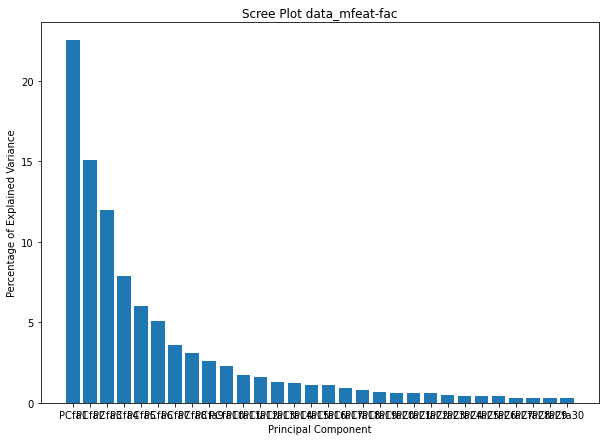

In [ ]:
pca=PCA(0.95)
pca.fit(scaled_data1)
pca_data1=pca.transform(scaled_data1)
pca_data1=pd.DataFrame(pca_data1, columns=['PCfa_'+str(i) for i in range(pca_data1.shape[1])])
per_var_data1=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PCfa'+str(x) for x in range(1,len(per_var_data1)+1)]
plt.figure(figsize=(10,7))
plt.bar(x=range(1,len(per_var_data1)+1),height=per_var_data1, tick_label=labels,)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot data_mfeat-fac')
plt.show()

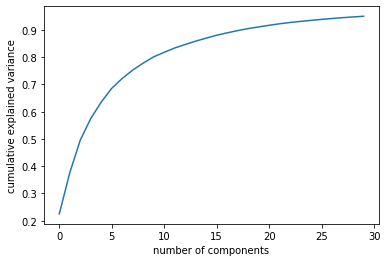

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
print('The original shape was:',data1.shape,' and the new shape is after performing PCA :',pca_data1.shape)

The original shape was: (2000, 216)  and the new shape is after performing PCA : (2000, 30)


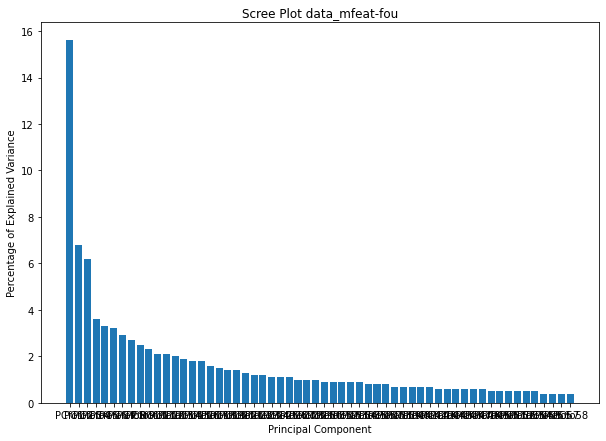

In [ ]:
pca=PCA(0.95)
pca.fit(scaled_data2)
pca_data2=pca.transform(scaled_data2)
pca_data2=pd.DataFrame(pca_data2, columns=['PCfo_'+str(i) for i in range(pca_data2.shape[1])])
per_var_data2=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PCfo'+str(x) for x in range(1,len(per_var_data2)+1)]
plt.figure(figsize=(10,7))
plt.bar(x=range(1,len(per_var_data2)+1),height=per_var_data2, tick_label=labels,)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot data_mfeat-fou')
plt.show()

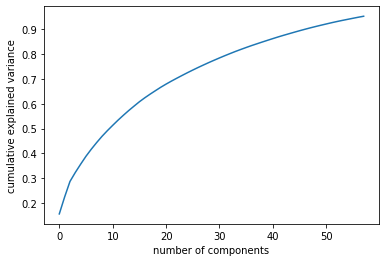

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
print('The original shape:',data2.shape,' and the new shape after performing PCA :',pca_data2.shape)

The original shape: (2000, 76)  and the new shape after performing PCA : (2000, 58)


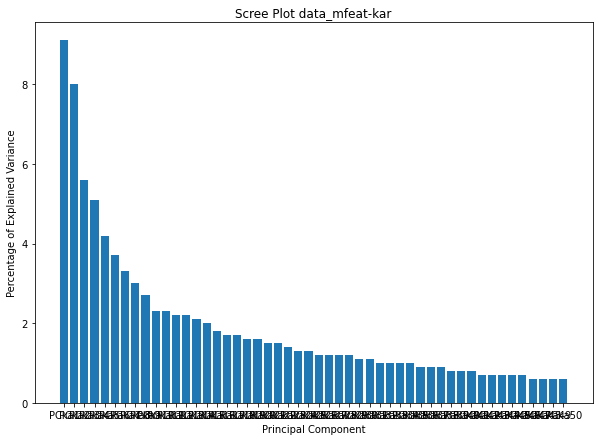

In [ ]:
pca=PCA(0.95)
pca.fit(scaled_data3)
pca_data3=pca.transform(scaled_data3)
pca_data3=pd.DataFrame(pca_data3, columns=['PCka_'+str(i) for i in range(pca_data3.shape[1])])
per_var_data3=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PCka'+str(x) for x in range(1,len(per_var_data3)+1)]
plt.figure(figsize=(10,7))
plt.bar(x=range(1,len(per_var_data3)+1),height=per_var_data3, tick_label=labels,)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot data_mfeat-kar')
plt.show()

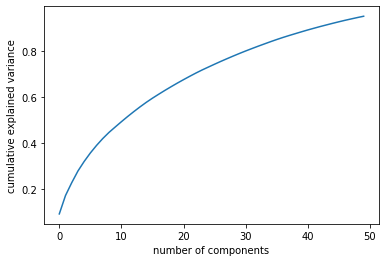

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
print('The original shape',data3.shape,' and the new shape afer performing PCA',pca_data3.shape)

The original shape (2000, 64)  and the new shape afer performing PCA (2000, 50)


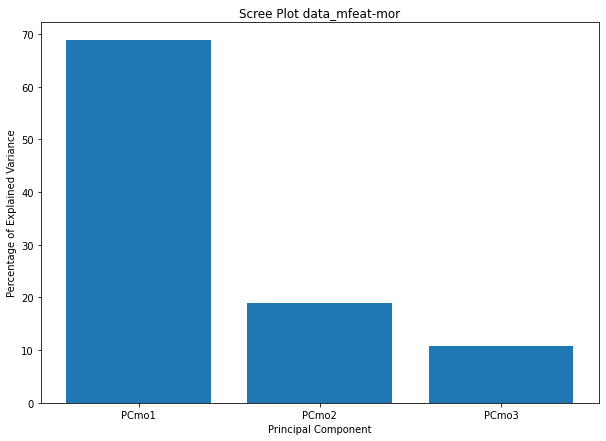

In [ ]:
pca=PCA(.95)
pca.fit(scaled_data4)
pca_data4=pca.transform(scaled_data4)
pca_data4=pd.DataFrame(pca_data4, columns=['PCmo_'+str(i) for i in range(pca_data4.shape[1])])
per_var_data4=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PCmo'+str(x) for x in range(1,len(per_var_data4)+1)]
plt.figure(figsize=(10,7))
plt.bar(x=range(1,len(per_var_data4)+1),height=per_var_data4, tick_label=labels,)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot data_mfeat-mor')
plt.show()

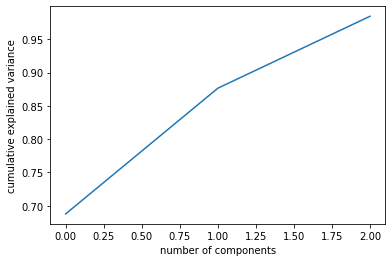

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
print('The original shape',data4.shape,'the new shape after performing PCA',pca_data4.shape)

The original shape (2000, 6) the new shape after performing PCA (2000, 3)


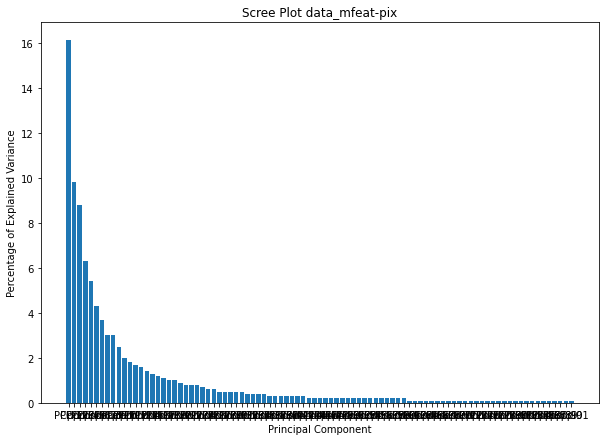

In [ ]:
pca=PCA(0.95)
pca.fit(scaled_data5)
pca_data5=pca.transform(scaled_data5)
pca_data5=pd.DataFrame(pca_data5, columns=['PCpi_'+str(i) for i in range(pca_data5.shape[1])])
per_var_data5=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PCpi'+str(x) for x in range(1,len(per_var_data5)+1)]
plt.figure(figsize=(10,7))
plt.bar(x=range(1,len(per_var_data5)+1),height=per_var_data5, tick_label=labels,)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot data_mfeat-pix')
plt.show()

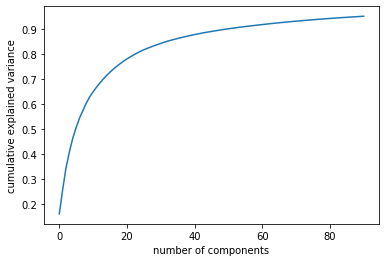

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
print('The original shape',data5.shape,'the new shape after performing PCA',pca_data5.shape)

The original shape (2000, 240) the new shape after performing PCA (2000, 91)


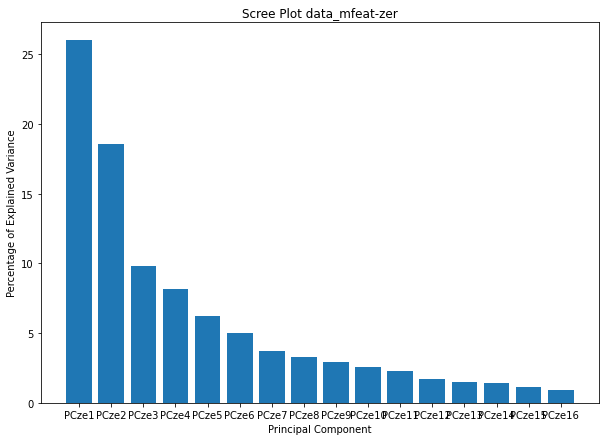

In [ ]:
pca=PCA(0.95)
pca.fit(scaled_data6)
pca_data6=pca.transform(scaled_data6)
pca_data6=pd.DataFrame(pca_data6, columns=['PCze_'+str(i) for i in range(pca_data6.shape[1])])
per_var_data6=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PCze'+str(x) for x in range(1,len(per_var_data6)+1)]
plt.figure(figsize=(10,7))
plt.bar(x=range(1,len(per_var_data6)+1),height=per_var_data6, tick_label=labels,)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot data_mfeat-zer')
plt.show()

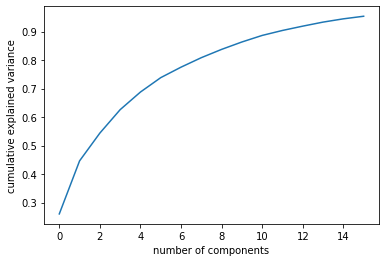

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
print('The original shape',data6.shape,' and the new shape after performing PCA',pca_data6.shape)

The original shape (2000, 47)  and the new shape after performing PCA (2000, 16)


In [ ]:
PCA_frames = [pca_data1, pca_data2,pca_data3,pca_data4,pca_data5,pca_data6]
  
PCA_result = pd.concat(PCA_frames,axis=1,join='inner')
print('The shape of the merged  PCA dataset is:',PCA_result.shape)

The shape of the merged  PCA dataset is: (2000, 248)


##PCA on the entire datasets
The threshold is 95% information of the original dataset.

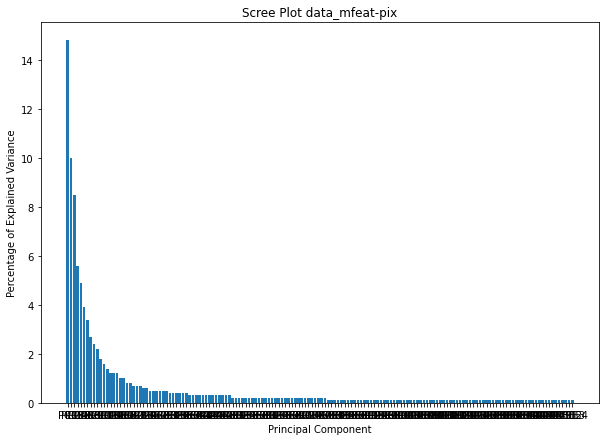

In [ ]:

pca=PCA(0.95)
pca.fit(scaled_result)
pca_result2=pca.transform(scaled_result)
pca_result2=pd.DataFrame(pca_result2, columns=['PC'+str(i) for i in range(pca_result2.shape[1])])
per_var_result=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PC'+str(x) for x in range(1,len(per_var_result)+1)]
plt.figure(figsize=(10,7))
plt.bar(x=range(1,len(per_var_result)+1),height=per_var_result, tick_label=labels,)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot data_mfeat-pix')
plt.show()

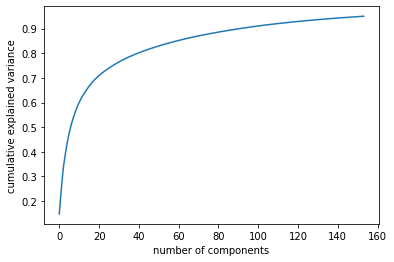

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
print('The original data shape ',result.shape,' and the new shape after performing PCA',pca_result2.shape)

The original data shape  (2000, 649)  and the new shape after performing PCA (2000, 154)


##Algorithm Building 

Here we are clustering our data after preprocessing .
The K-means clustering is used because we want specify 10 number of clusters.




In [ ]:
# K-mean clustering on the PCA on the six feature sets
from sklearn.cluster import KMeans 
k_means = KMeans(init = "k-means++", n_clusters = 10,n_init=10,random_state=42)
k_means.fit(PCA_result)
labels = k_means.labels_
import numpy
lst=0
p=0
new=[]
for i in range(0,2000,200):
  (unique, counts) = numpy.unique(labels[i:i+200], return_counts=True)
  frequencies= numpy.asarray((unique, counts))
  #print(frequencies)
  v=labels[i:i+200]
  a=np.bincount(labels[i:i+200]).argmax()
  #print(a)
  for j in range(len(v)):
    if v[j]==a:
      v[j]=p
    new.append(v[j])
  p+=1
label_new1=np.array(new)

##Checking the accuracy of the model.

In [ ]:
print('the accurancy is:',accuracy_score(true_label, label_new1))

the accurancy is: 0.92


In [ ]:
print('the adjusted_rand_score is:',adjusted_rand_score(true_label, labels))

the adjusted_rand_score is: 0.8328759006325765


**Visualising the 10 clusters by the two of the principal components**

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


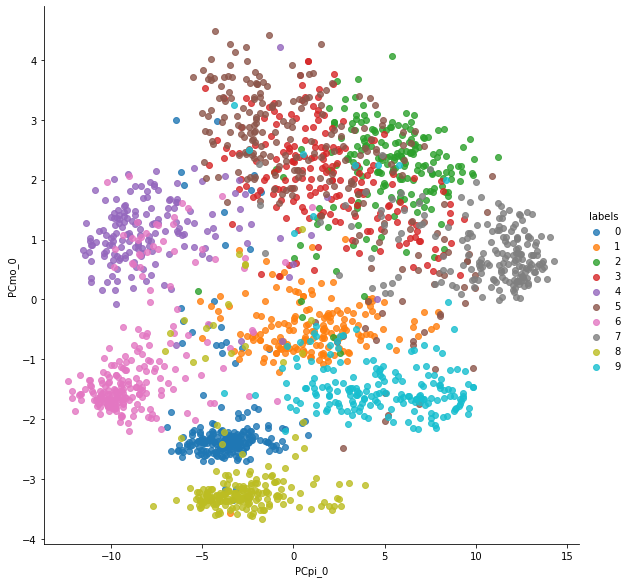

In [ ]:
import seaborn as sns
PCA_result ['labels']=label_new1
#plot data with seaborn
facet = sns.lmplot(data=PCA_result, x='PCpi_0', y='PCmo_0', hue='labels', 
                   fit_reg=False, legend=True, legend_out=True,size=8)

In [ ]:
#performing clustering on the entire dataset.
from sklearn.cluster import KMeans 
k_means = KMeans(init = "k-means++", n_clusters = 10,n_init=10,random_state=42)
k_means.fit(pca_result2)
labels2 = k_means.labels_
import numpy
lst=0
p=0
new2=[]
for i in range(0,2000,200):
  (unique, counts) = numpy.unique(labels2[i:i+200], return_counts=True)
  frequencies= numpy.asarray((unique, counts))
  #print(frequencies)
  v=labels2[i:i+200]
  a=np.bincount(labels2[i:i+200]).argmax()
  #print(a)
  for j in range(len(v)):
    if v[j]==a:
      v[j]=p
    new2.append(v[j])
  p+=1
label_new2=np.array(new2)

In [ ]:
print('the accuracy is:',accuracy_score(true_label, label_new2))

the accuracy is: 0.927


In [ ]:
print('the adjusted_rand_score is:',adjusted_rand_score(true_label, labels2))

the adjusted_rand_score is: 0.8451932091753689


**Visualizing the 10 clusters by two principal components**

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


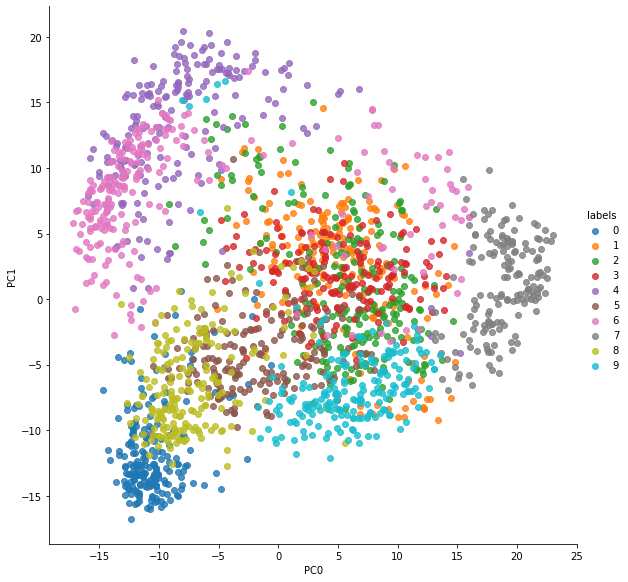

In [ ]:
pca_result2 ['labels']=label_new2
#plot data with seaborn
facet = sns.lmplot(data=pca_result2, x='PC0', y='PC1', hue='labels', 
                   fit_reg=False, legend=True, legend_out=True,size=8,)

In [ ]:
(unique, counts) = numpy.unique(labels2, return_counts=True)
frequencies = numpy.asarray( (unique,counts))
print(frequencies)

[[  0   1   2   3   4   5   6   7   8   9]
 [207 199 228 191 196 185 240 162 199 193]]


In [ ]:
pca_data3

,PCka_0,PCka_1,PCka_2,PCka_3,PCka_4,PCka_5,PCka_6,PCka_7,PCka_8,PCka_9,PCka_10,PCka_11,PCka_12,PCka_13,PCka_14,PCka_15,PCka_16,PCka_17,PCka_18,PCka_19,PCka_20,PCka_21,PCka_22,PCka_23,PCka_24,PCka_25,PCka_26,PCka_27,PCka_28,PCka_29,PCka_30,PCka_31,PCka_32,PCka_33,PCka_34,PCka_35,PCka_36,PCka_37,PCka_38,PCka_39,PCka_40,PCka_41,PCka_42,PCka_43,PCka_44,PCka_45,PCka_46,PCka_47,PCka_48,PCka_49
0,0.650578,-0.795976,1.355702,-1.148324,1.371941,0.203682,-0.018499,-0.069188,0.528946,0.185767,-1.385458,0.189302,2.468119,0.187700,0.317832,0.101076,-1.011532,0.068169,-2.067912,-0.019927,-0.063128,-1.902652,-0.389249,1.502736,-1.404719,0.234652,0.167907,1.789675,-0.290897,-1.644602,-0.286911,1.206471,0.751010,-0.890230,-0.058853,-0.568088,0.788965,-0.238319,-0.415394,0.127160,1.074393,-0.513775,0.309894,0.426304,-1.033582,1.139901,0.082254,0.375837,0.054060,-0.721037
1,2.011860,-0.264211,0.312986,-2.108408,3.106223,1.442624,0.215272,-0.548686,0.448643,-0.902511,1.194850,-0.971916,1.256145,-2.036581,0.289485,-0.998713,-0.316947,1.258796,-0.613794,-0.317056,0.635919,0.149689,-0.233615,-0.402239,-0.555617,-1.126972,-0.329596,-0.284630,-0.362806,-2.090008,0.700615,-0.232695,1.626965,-0.737401,1.985898,-1.497122,-0.010007,-0.718658,-0.247490,1.515823,-1.098710,0.548104,-0.179104,-0.871359,-0.716809,0.198526,0.084508,-0.558502,0.499095,-0.507812
2,-1.913898,-1.294954,0.164031,-2.476610,1.383621,-1.143549,1.897732,-0.522519,-0.486607,0.557894,1.272380,-0.570252,1.311135,-0.048057,0.313940,-1.787998,1.163500,0.595703,-1.562588,-0.532938,-2.267048,-0.327405,-0.086089,0.472411,-0.008788,0.046675,0.925344,0.147518,-0.413373,1.276624,0.243308,0.487038,2.543369,0.940658,1.222244,0.200136,1.242933,0.892071,0.956111,-0.275034,0.402737,-1.041778,1.425730,-0.079760,-0.594252,1.142472,0.614559,-0.144531,-0.346498,0.525207
3,-0.164340,-2.210302,2.046110,-1.221456,0.196467,-1.439472,0.291917,-2.096124,0.774848,0.023451,1.500989,0.274710,2.521553,-1.421067,1.616387,0.224765,-1.137617,-0.509433,0.274330,0.527142,0.329889,0.516468,-0.585138,-0.345468,0.969603,0.321112,-0.830600,-0.258766,-0.020795,-0.304335,-0.359593,-1.121626,-0.412123,1.031777,-0.122756,-0.660867,-0.338121,-0.585898,-0.824677,-0.354059,0.869880,-0.500082,-0.934279,-0.096426,-0.028245,-0.354636,0.483471,-0.487344,0.312422,0.764391
4,4.020279,-0.435998,0.710938,-1.252845,1.838018,2.326837,0.280597,0.100776,0.892134,1.258023,-0.663132,0.189159,2.280524,-1.924808,-1.227840,-0.156074,0.716872,-1.013787,-0.678422,0.721722,0.773431,-0.625703,0.610868,-0.253702,-0.114861,0.349109,0.519700,0.560661,0.754077,-0.599449,1.088947,-1.791614,1.668133,0.063596,0.960696,0.225138,0.460004,-0.636510,0.223795,0.249038,-0.183356,0.042727,0.731841,-1.062945,0.377345,-1.372990,0.969137,-0.690270,1.049843,0.217507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-2.913113,1.463578,-0.763174,-1.459326,0.657108,-0.227564,0.543579,-0.240400,0.856187,0.730801,-1.964973,3.179481,0.139607,0.661010,0.067320,1.428403,1.126724,-0.983827,-0.732845,1.427056,0.649644,1.835910,-0.065239,-0.049507,-0.356842,0.453656,0.802967,1.127878,0.685156,0.620355,0.879508,-0.222432,-0.137184,0.921904,-0.777544,0.123622,-0.081116,-0.416285,0.008962,-0.519595,-0.107030,-0.002853,0.913829,-0.065706,1.099072,0.174418,-0.546921,-0.742471,0.052742,0.424439
1996,-0.592313,0.252305,1.179378,0.098490,1.584217,1.366774,0.172419,-1.551906,0.691512,-0.898829,-0.917620,-0.646561,0.345609,-1.128672,-0.905272,-1.601164,-2.999737,1.550145,1.921973,0.544318,-0.693830,2.018581,-0.309428,-0.641549,-0.257980,-0.668712,0.532469,-0.003115,1.349825,-2.135035,1.362879,-1.157935,-0.193205,-0.109326,-0.652979,-0.629022,0.378451,0.379943,-0.489783,0.074530,0.537132,-0.055533,-1.578209,0.646479,-0.228972,-0.285676,0.409985,0.526575,-1.537499,0.039462
1997,-3.892526,1.034676,0.432322,-2.067456,2.401797,0.520463,-1.

##checking the predictions
Here we compare the predicting clusters to the true_label created at the intial stage to the predictions.We just predicted the first 20 predictions below. 

In [ ]:
Lab= pd.DataFrame(scaled_result, columns=result.columns)

In [ ]:
LAB=np.transpose([true_label, label_new1,label_new2])
LAB1=pd.DataFrame(LAB,columns=['true_label','label_new1','label_new2'])

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
print('the accurancy is:',adjusted_rand_score(true_label, labels2))

the accurancy is: 0.8451932091753689


In [ ]:
LAB1.sample(20)

,true_label,label_new1,label_new2
1702,8,8,8
433,2,2,2
1954,9,9,9
414,2,2,2
522,2,2,2
844,4,4,4
234,1,1,1
1064,5,5,5
756,3,3,3
707,3,3,3


##Clustering the six features separately 

**K-means for data1 represents mfeat-fac



In [ ]:
#performing clustering on the entire dataset.
from sklearn.cluster import KMeans 
k_means = KMeans(init = "k-means++", n_clusters = 10,n_init=10,random_state=42)
k_means.fit(pca_data1)
label_data1 = k_means.labels_
import numpy
lst=0
p=0
new2=[]
for i in range(0,2000,200):
  (unique, counts) = numpy.unique(label_data1[i:i+200], return_counts=True)
  frequencies= numpy.asarray((unique, counts))
  #print(frequencies)
  v=label_data1[i:i+200]
  a=np.bincount(label_data1[i:i+200]).argmax()
  #print(a)
  for j in range(len(v)):
    if v[j]==a:
      v[j]=p
    new2.append(v[j])
  p+=1
label_new_data1=np.array(new2)

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
print('the adjustured rand score  is:',adjusted_rand_score(true_label, label_data1))
print('the accurancy is:',accuracy_score(true_label, label_new_data1))

the adjustured rand score  is: 0.6371121479990783
the accurancy is: 0.805


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


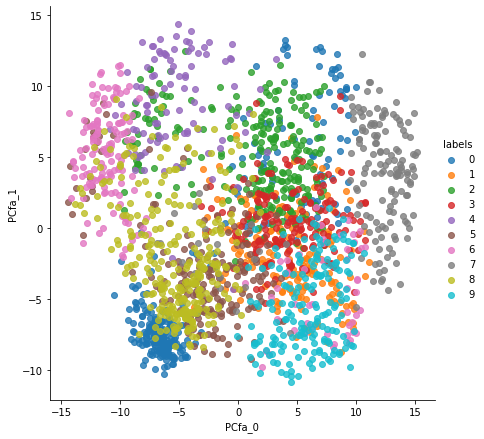

In [ ]:
pca_data1 ['labels']=label_data1
#plot data with seaborn
facet = sns.lmplot(data=pca_data1, x='PCfa_0', y='PCfa_1', hue='labels', 
                   fit_reg=False, legend=True, legend_out=True,size=6,)

** K-means clustering on data2 represents mfeat-fou**



In [ ]:
#performing clustering on the entire dataset.
from sklearn.cluster import KMeans 
k_means = KMeans(init = "k-means++", n_clusters = 10,n_init=10,random_state=42)
k_means.fit(pca_data2)
label_data2 = k_means.labels_
import numpy
lst=0
p=0
new2=[]
for i in range(0,2000,200):
  (unique, counts) = numpy.unique(label_data2[i:i+200], return_counts=True)
  frequencies= numpy.asarray((unique, counts))
  #print(frequencies)
  v=label_data2[i:i+200]
  a=np.bincount(label_data2[i:i+200]).argmax()
  #print(a)
  for j in range(len(v)):
    if v[j]==a:
      v[j]=p
    new2.append(v[j])
  p+=1
label_new_data2=np.array(new2)

In [ ]:
print('the adjustured rand score  is:',adjusted_rand_score(true_label, label_data2))
print('the accuracy is:',accuracy_score(true_label, label_new_data2))

the adjustured rand score  is: 0.40755960155952886
the accuracy is: 0.64


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


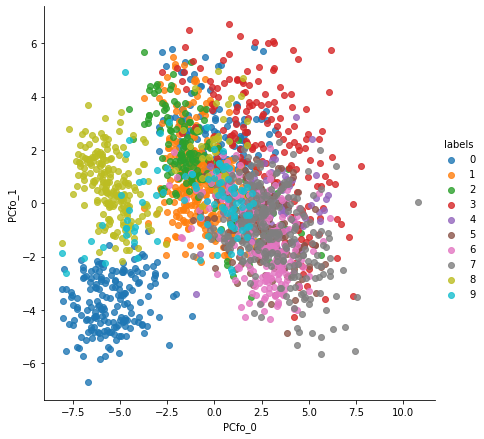

In [ ]:
pca_data2 ['labels']=label_data2
#plot data with seaborn
facet = sns.lmplot(data=pca_data2, x='PCfo_0', y='PCfo_1', hue='labels', 
                   fit_reg=False, legend=True, legend_out=True,size=6,)

**K-means Clustering on data3 represents mfeat-kar**



In [ ]:
#performing clustering on the entire dataset.
from sklearn.cluster import KMeans 
k_means = KMeans(init = "k-means++", n_clusters = 10,n_init=10,random_state=42)
k_means.fit(pca_data3)
label_data3 = k_means.labels_
import numpy
lst=0
p=0
new2=[]
for i in range(0,2000,200):
  (unique, counts) = numpy.unique(label_data3[i:i+200], return_counts=True)
  frequencies= numpy.asarray((unique, counts))
  #print(frequencies)
  v=label_data3[i:i+200]
  a=np.bincount(label_data3[i:i+200]).argmax()
  #print(a)
  for j in range(len(v)):
    if v[j]==a:
      v[j]=p
    new2.append(v[j])
  p+=1
label_new_data3=np.array(new2)

In [ ]:
print('the adjustured rand score  is:',adjusted_rand_score(true_label, label_data3))
print('the accurancy is:',accuracy_score(true_label, label_new_data3))

the adjustured rand score  is: 0.5634625576757407
the accurancy is: 0.7425


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


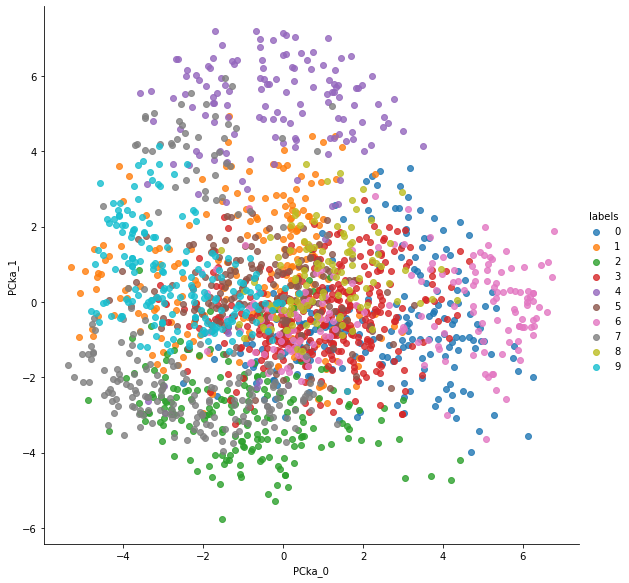

In [ ]:
pca_data3 ['labels']=label_data3
#plot data with seaborn
facet = sns.lmplot(data=pca_data3, x='PCka_0', y='PCka_1', hue='labels', 
                   fit_reg=False, legend=True, legend_out=True,size=8,)

**K -means Clustering on data4 represents  mfeat-mor



In [ ]:
#performing clustering on the entire dataset.
from sklearn.cluster import KMeans 
k_means = KMeans(init = "k-means++", n_clusters = 10,n_init=10,random_state=42)
k_means.fit(pca_data4)
label_data4 = k_means.labels_
import numpy
lst=0
p=0
new2=[]
for i in range(0,2000,200):
  (unique, counts) = numpy.unique(label_data4[i:i+200], return_counts=True)
  frequencies= numpy.asarray((unique, counts))
  #print(frequencies)
  v=label_data4[i:i+200]
  a=np.bincount(label_data4[i:i+200]).argmax()
  #print(a)
  for j in range(len(v)):
    if v[j]==a:
      v[j]=p
    new2.append(v[j])
  p+=1
label_new_data4=np.array(new2)

In [ ]:
print('the adjustured rand score  is:',adjusted_rand_score(true_label, label_data4))
print('the accurancy is:',accuracy_score(true_label, label_new_data4))

the adjustured rand score  is: 0.6013538006441933
the accurancy is: 0.7675


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


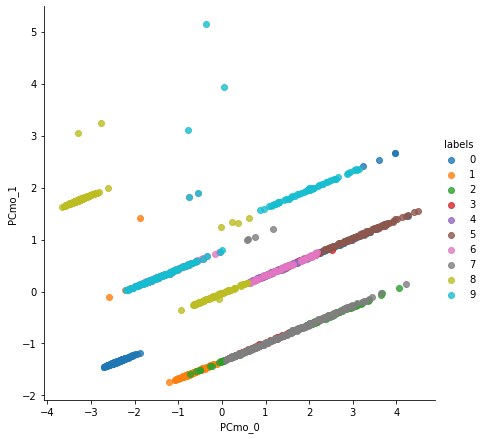

In [ ]:
pca_data4 ['labels']=label_data4
#plot data with seaborn
facet = sns.lmplot(data=pca_data4, x='PCmo_0', y='PCmo_1', hue='labels', 
                   fit_reg=False, legend=True, legend_out=True,size=6,)

**K-means clustering on data5 represents mfeat-pix



In [ ]:
#performing clustering on the entire dataset.
from sklearn.cluster import KMeans 
k_means = KMeans(init = "k-means++", n_clusters = 10,n_init=10,random_state=42)
k_means.fit(pca_data5)
label_data5 = k_means.labels_
import numpy
lst=0
p=0
new2=[]
for i in range(0,2000,200):
  (unique, counts) = numpy.unique(label_data5[i:i+200], return_counts=True)
  frequencies= numpy.asarray((unique, counts))
  #print(frequencies)
  v=label_data5[i:i+200]
  a=np.bincount(label_data5[i:i+200]).argmax()
  #print(a)
  for j in range(len(v)):
    if v[j]==a:
      v[j]=p
    new2.append(v[j])
  p+=1
label_new_data5=np.array(new2)

In [ ]:
print('the adjustured rand score  is:',adjusted_rand_score(true_label, label_data5))
print('the accurancy is:',accuracy_score(true_label, label_new_data5))

the adjustured rand score  is: 0.7100335329944212
the accurancy is: 0.8435


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


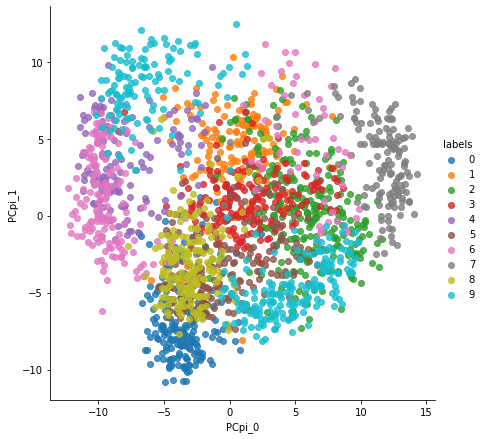

In [ ]:
pca_data5 ['labels']=label_data5
#plot data with seaborn
facet = sns.lmplot(data=pca_data5, x='PCpi_0', y='PCpi_1', hue='labels', 
                   fit_reg=False, legend=True, legend_out=True,size=6)

**K-means Clustering data6 represents mfeat-zer

In [ ]:
#performing clustering on the entire dataset.
from sklearn.cluster import KMeans 
k_means = KMeans(init = "k-means++", n_clusters = 10,n_init=10,random_state=42)
k_means.fit(pca_data6)
label_data6 = k_means.labels_
import numpy
lst=0
p=0
new2=[]
for i in range(0,2000,200):
  (unique, counts) = numpy.unique(label_data6[i:i+200], return_counts=True)
  frequencies= numpy.asarray((unique, counts))
  #print(frequencies)
  v=label_data6[i:i+200]
  a=np.bincount(label_data6[i:i+200]).argmax()
  #print(a)
  for j in range(len(v)):
    if v[j]==a:
      v[j]=p
    new2.append(v[j])
  p+=1
label_new_data6=np.array(new2)

In [ ]:
print('the adjustured rand score  is:',adjusted_rand_score(true_label, label_data6))
print('the accurancy is:',accuracy_score(true_label, label_new_data6))

the adjustured rand score  is: 0.40455491199387345
the accurancy is: 0.6175


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


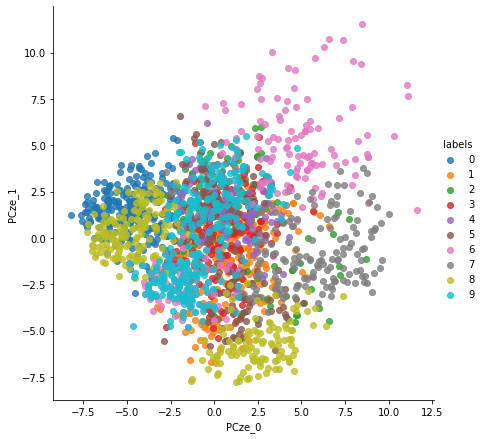

In [ ]:
pca_data6 ['labels']=label_data6
#plot data with seaborn
facet = sns.lmplot(data=pca_data6, x='PCze_0', y='PCze_1', hue='labels', 
                   fit_reg=False, legend=True, legend_out=True,size=6)

In [ ]:
pca_data6.columns

Index(['PCze_0', 'PCze_1', 'PCze_2', 'PCze_3', 'PCze_4', 'PCze_5', 'PCze_6',
       'PCze_7', 'PCze_8', 'PCze_9', 'PCze_10', 'PCze_11', 'PCze_12',
       'PCze_13', 'PCze_14', 'PCze_15', 'labels'],
      dtype='object')